# Problem Statement

Despite this intense competition, the telecommunications industry experiences more than 10% churn rate every year. Customer retention has now become even more important than customer acquisition, since acquiring a new customer costs 5-10 times more than retaining an existing one. Building Classification Model to find probability of customer churn with the help of given customer features and help telecom companies to reduce their churn rate for business profit.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
data = pd.read_csv("Churn.csv")

# EDA

- Dropping the columns unnamed:0, state, area code
- column name change (. to _) because it shows error during deployment
- checking and dropping duplicates
- dtype change for column day.charge and eve.mins to to_numeric using (error=coerce)
- checking null values and percentage of null values
- Dropping the null values

In [3]:
# Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [4]:
# Drop Unnamed Column
data= data.drop(columns=['Unnamed: 0','state','area.code'])

In [5]:
data

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [6]:
# Rename column names
data.rename(columns={'account.length' : 'Account_length','voice.plan' : 'Voice_plan','voice.messages' : 'Voice_messages','intl.plan' : 'Intl_plan','intl.min' : 'Intl_min','intl.calls' : 'Intl_calls', 'intl.charge' : 'Intl_charge','intl.mins' : 'Intl_mins','day.mins' : 'Day_mins', 'day.calls' : 'Day_calls', 'day.charge' : 'Day_charge', 'eve.mins' : 'Eve_mins', 'eve.calls' : 'Eve_calls', 'eve.charge' : 'Eve_charge', 'night.mins' : 'Night_mins','night.calls' : 'Night_calls','night.charge' : 'Night_charge', 'customer.calls' : 'Customer_calls', 'churn' : 'Churn'},inplace= True)

In [7]:
# Convert Datatypes
data['Day_charge'] = pd.to_numeric(data['Day_charge'],errors='coerce')

In [8]:
data['Eve_mins'] = pd.to_numeric(data['Eve_mins'],errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_length  5000 non-null   int64  
 1   Voice_plan      5000 non-null   object 
 2   Voice_messages  5000 non-null   int64  
 3   Intl_plan       5000 non-null   object 
 4   Intl_mins       5000 non-null   float64
 5   Intl_calls      5000 non-null   int64  
 6   Intl_charge     5000 non-null   float64
 7   Day_mins        5000 non-null   float64
 8   Day_calls       5000 non-null   int64  
 9   Day_charge      4993 non-null   float64
 10  Eve_mins        4976 non-null   float64
 11  Eve_calls       5000 non-null   int64  
 12  Eve_charge      5000 non-null   float64
 13  Night_mins      5000 non-null   float64
 14  Night_calls     5000 non-null   int64  
 15  Night_charge    5000 non-null   float64
 16  Customer_calls  5000 non-null   int64  
 17  Churn           5000 non-null   o

In [10]:
# drop null values
data.dropna(inplace=True)
# there having null values which is less than 5% so we drop it.

In [11]:
#checking missing values
data.isna().sum()

Account_length    0
Voice_plan        0
Voice_messages    0
Intl_plan         0
Intl_mins         0
Intl_calls        0
Intl_charge       0
Day_mins          0
Day_calls         0
Day_charge        0
Eve_mins          0
Eve_calls         0
Eve_charge        0
Night_mins        0
Night_calls       0
Night_charge      0
Customer_calls    0
Churn             0
dtype: int64

In [12]:
data

,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls,Churn
0,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [13]:
# convert target column (yes/no) into binary value
data['Churn'] = data['Churn'].map({'no':0, 'yes':1})

In [14]:
# splitting data
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
#store object datatypes into different variable to convert it into binary value 
cat_cols = x.select_dtypes(object).columns
cat_cols

Index(['Voice_plan', 'Intl_plan'], dtype='object')

In [16]:
#libraries for conversion data into binary 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


In [17]:
#store variable
le= LabelEncoder()
Oe = OrdinalEncoder()

In [18]:
x[cat_cols] = Oe.fit_transform(x[cat_cols])
x

,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls
0,128,1.0,25,0.0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,107,1.0,26,0.0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,137,0.0,0,0.0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,84,0.0,0,1.0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,75,0.0,0,1.0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1.0,40,0.0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4996,152,0.0,0,0.0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4997,61,0.0,0,0.0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1
4998,109,0.0,0,0.0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0


In [19]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Outlier Detection

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
iso = IsolationForest(random_state=1)
iso.fit(x,y)
outliers = iso.predict(x)

In [22]:
x['Outliers'] = outliers
x

,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls,Outliers
0,128,1.0,25,0.0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,1
1,107,1.0,26,0.0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,1
2,137,0.0,0,0.0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,1
3,84,0.0,0,1.0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,-1
4,75,0.0,0,1.0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1.0,40,0.0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,1
4996,152,0.0,0,0.0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,61,0.0,0,0.0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,1
4998,109,0.0,0,0.0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,1


In [23]:
x[x['Outliers']==-1]

,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls,Outliers
3,84,0.0,0,1.0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,-1
7,147,0.0,0,1.0,7.1,6,1.92,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,0,-1
9,141,1.0,37,1.0,11.2,5,3.02,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,0,-1
15,161,0.0,0,0.0,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,-1
16,85,1.0,27,0.0,13.8,4,3.73,196.4,139,33.39,280.9,90,23.88,89.3,75,4.02,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,137,0.0,0,1.0,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,-1
4963,47,1.0,31,1.0,9.7,4,2.62,140.6,114,23.90,264.6,44,22.49,238.7,121,10.74,2,-1
4971,128,1.0,28,0.0,17.7,4,4.78,115.4,96,19.62,185.4,94,15.76,209.3,69,9.42,0,-1
4987,127,1.0,27,0.0,8.0,4,2.16,157.6,107,26.79,280.6,49,23.85,75.1,77,3.38,1,-1


<AxesSubplot:>

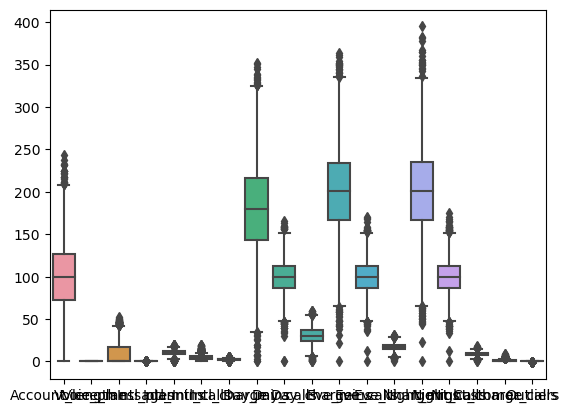

In [24]:
sns.boxplot(data=x)

- We have detected 571 outliers in the dataset, which is more than 10% of length od dataset.
- So we have to use capping

Capping outlier using IQR

In [25]:
x.drop(columns=['Outliers'],inplace=True)

In [26]:
def outlier_replace_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    #print(Q1,Q3)
    IQR = Q3-Q1
    Lower = Q1-(1.5*IQR)
    Upper = Q3+(1.5*IQR)
    data[column] = np.where(data[column]>Upper, Upper, np.where(data[column]<Lower, Lower, data[column]))

In [27]:
x.columns

Index(['Account_length', 'Voice_plan', 'Voice_messages', 'Intl_plan',
       'Intl_mins', 'Intl_calls', 'Intl_charge', 'Day_mins', 'Day_calls',
       'Day_charge', 'Eve_mins', 'Eve_calls', 'Eve_charge', 'Night_mins',
       'Night_calls', 'Night_charge', 'Customer_calls'],
      dtype='object')

In [28]:
outlier_replace_iqr(x,'Account_length' )
#outlier_replace_iqr(x,'Voice_messages')
outlier_replace_iqr(x, 'Intl_mins')
outlier_replace_iqr(x, 'Intl_calls')
outlier_replace_iqr(x, 'Intl_charge')
outlier_replace_iqr(x, 'Day_mins')
outlier_replace_iqr(x, 'Day_calls')
outlier_replace_iqr(x, 'Day_charge')
outlier_replace_iqr(x, 'Eve_mins')
outlier_replace_iqr(x, 'Eve_calls')
outlier_replace_iqr(x, 'Eve_charge')
outlier_replace_iqr(x, 'Night_mins')
outlier_replace_iqr(x, 'Night_calls')
outlier_replace_iqr(x, 'Night_charge')
outlier_replace_iqr(x, 'Customer_calls')

<AxesSubplot:>

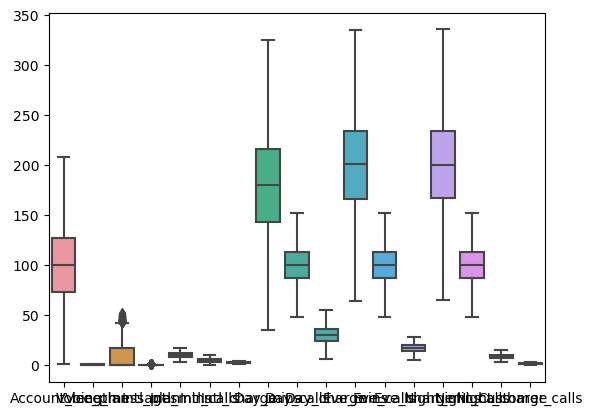

In [29]:
sns.boxplot(data=x)

above Boxplot shows there is no outlier

# Feature Selection

# 1-Chi Square 

In [30]:
test = SelectKBest(score_func=chi2, k=4)
chi = test.fit(x,y)

In [31]:
chi.scores_

array([3.50453508e+01, 4.57368976e+01, 1.14251282e+03, 3.05958303e+02,
       1.30223100e+01, 1.58594587e+01, 3.50756112e+00, 3.41072410e+03,
       5.28130502e+00, 5.79705012e+02, 4.88050795e+02, 8.13904256e-01,
       4.14882748e+01, 1.30530887e+02, 8.66669099e-01, 5.87302366e+00,
       1.03966897e+02])

In [32]:
x.columns

Index(['Account_length', 'Voice_plan', 'Voice_messages', 'Intl_plan',
       'Intl_mins', 'Intl_calls', 'Intl_charge', 'Day_mins', 'Day_calls',
       'Day_charge', 'Eve_mins', 'Eve_calls', 'Eve_charge', 'Night_mins',
       'Night_calls', 'Night_charge', 'Customer_calls'],
      dtype='object')

In [33]:
chidf = pd.DataFrame(chi.scores_).T
chidf.columns = x.columns

In [34]:
chidf

,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls
0,35.045351,45.736898,1142.512819,305.958303,13.02231,15.859459,3.507561,3410.724102,5.281305,579.705012,488.050795,0.813904,41.488275,130.530887,0.866669,5.873024,103.966897


# 2. RFE

In [35]:
lg = LogisticRegression()

rfe = RFE(lg, n_features_to_select=5)

rfe.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [36]:
rfe.ranking_

array([ 9,  1,  2,  1,  1,  1, 11,  6,  5,  8,  7,  4, 10, 12,  3, 13,  1])

In [37]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True])

In [38]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls
0,9,1,2,1,1,1,11,6,5,8,7,4,10,12,3,13,1


In [39]:
rfe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Account_length  1 non-null      int32
 1   Voice_plan      1 non-null      int32
 2   Voice_messages  1 non-null      int32
 3   Intl_plan       1 non-null      int32
 4   Intl_mins       1 non-null      int32
 5   Intl_calls      1 non-null      int32
 6   Intl_charge     1 non-null      int32
 7   Day_mins        1 non-null      int32
 8   Day_calls       1 non-null      int32
 9   Day_charge      1 non-null      int32
 10  Eve_mins        1 non-null      int32
 11  Eve_calls       1 non-null      int32
 12  Eve_charge      1 non-null      int32
 13  Night_mins      1 non-null      int32
 14  Night_calls     1 non-null      int32
 15  Night_charge    1 non-null      int32
 16  Customer_calls  1 non-null      int32
dtypes: int32(17)
memory usage: 196.0 bytes


# 3. Tree Based 

In [40]:
dt = DecisionTreeClassifier(criterion='entropy')

In [41]:
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [42]:
dt_df = pd.DataFrame(dt.feature_importances_).T
dt_df.columns = x.columns
dt_df

,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls
0,0.028226,0.034866,0.019563,0.092159,0.086831,0.064805,0.010186,0.088371,0.033244,0.152666,0.076006,0.019189,0.07059,0.032201,0.038276,0.044162,0.108659


In [43]:
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_length  1 non-null      float64
 1   Voice_plan      1 non-null      float64
 2   Voice_messages  1 non-null      float64
 3   Intl_plan       1 non-null      float64
 4   Intl_mins       1 non-null      float64
 5   Intl_calls      1 non-null      float64
 6   Intl_charge     1 non-null      float64
 7   Day_mins        1 non-null      float64
 8   Day_calls       1 non-null      float64
 9   Day_charge      1 non-null      float64
 10  Eve_mins        1 non-null      float64
 11  Eve_calls       1 non-null      float64
 12  Eve_charge      1 non-null      float64
 13  Night_mins      1 non-null      float64
 14  Night_calls     1 non-null      float64
 15  Night_charge    1 non-null      float64
 16  Customer_calls  1 non-null      float64
dtypes: float64(17)
memory usage: 264.0 byte

- Chi2
-  voice_message,intl_plan,day_mins,day_charge,eve_mins,night_mins,customer_calls

- RFE
- voice_messages,voice_plan,intl_plan,intl_calls,day_mins,customer_calls

- Tree
- customer_calls,day_mins,intl_plan,intl_charge,day_charge

- Common Features
- intl_plan, day_mins, customer_calls,voice_message, day_charge,

In [44]:
# data after feature selection
data1 = x[['Intl_plan','Day_mins','Customer_calls','Voice_messages','Day_charge']]

In [45]:
data1

,Intl_plan,Day_mins,Customer_calls,Voice_messages,Day_charge
0,0.0,265.1,1.0,25,45.07
1,0.0,161.6,1.0,26,27.47
2,0.0,243.4,0.0,0,41.38
3,1.0,299.4,2.0,0,50.90
4,1.0,166.7,3.0,0,28.34
...,...,...,...,...,...
4995,0.0,235.7,2.0,40,40.07
4996,0.0,184.2,3.0,0,31.31
4997,0.0,140.6,1.0,0,23.90
4998,0.0,188.8,0.0,0,32.10


In [46]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# PPSCORE

ppscore is also one of the method used for feature selection

In [47]:
import ppscore as ps

In [48]:
ps.matrix(data1)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Intl_plan,Intl_plan,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Intl_plan,Day_mins,0.000000,regression,True,mean absolute error,42.925538,42.936180,DecisionTreeRegressor()
2,Intl_plan,Customer_calls,0.000000,regression,True,mean absolute error,0.896357,0.956344,DecisionTreeRegressor()
3,Intl_plan,Voice_messages,0.000000,regression,True,mean absolute error,7.754880,11.413030,DecisionTreeRegressor()
4,Intl_plan,Day_charge,0.000000,regression,True,mean absolute error,7.297199,7.299010,DecisionTreeRegressor()
5,Day_mins,Intl_plan,0.000000,regression,True,mean absolute error,0.094586,0.174617,DecisionTreeRegressor()
6,Day_mins,Day_mins,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,Day_mins,Customer_calls,0.000000,regression,True,mean absolute error,0.896357,1.114200,DecisionTreeRegressor()
8,Day_mins,Voice_messages,0.000000,regression,True,mean absolute error,7.754880,11.754907,DecisionTreeRegressor()
9,Day_mins,Day_charge,0.999350,regression,True,mean absolute error,7.297199,0.004746,DecisionTreeRegressor()


# Feature Scaling

In [49]:
#Feature scaling (it is use when we calculate distance )
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [50]:
data2 = data1.copy() 

In [51]:
data1 = sc.fit_transform(data1)
data1

array([[-0.32321457,  1.58012091, -0.44042803,  1.27323117,  1.58043319],
       [-0.32321457, -0.34924089, -0.44042803,  1.34706256, -0.34952835],
       [-0.32321457,  1.17560737, -1.3440147 , -0.57255359,  1.17579921],
       ...,
       [-0.32321457, -0.7407056 , -0.44042803, -0.57255359, -0.74100351],
       [-0.32321457,  0.15779912, -1.3440147 , -0.57255359,  0.15818312],
       [-0.32321457, -0.94948678, -1.3440147 ,  1.93771369, -0.94935163]])

# Model Building

In [52]:
# splitting data for model building
x = data1
y = data['Churn']

In [53]:
# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB


In [54]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [55]:
# Test options and evaluation metric
#num_folds = 10
seed = 7
scoring = 'accuracy'

# Check which algorithm is best Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('CART', DecisionTreeClassifier()))

              
results = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, xtrain, ytrain,cv=kfold,scoring='accuracy')
    #results.append(cv)
    print(f'Model: {name} Accuracy:{cv.mean()}')

Model: LR Accuracy:0.8633862005240307
Model: KNN Accuracy:0.884025290178854
Model: SVC Accuracy:0.8953387846031162
Model: CART Accuracy:0.8641551586648608


In [56]:
from sklearn.pipeline import Pipeline

- Ensemble Technique

In [57]:
num_folds = 10
# ensembles
ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 xtrain,
                                 ytrain,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.879744 (0.015330)
GBM: 0.902390 (0.014184)
RF: 0.882266 (0.015325)
ET: 0.867678 (0.013747)


In [58]:
# using this function to build models
def predict(model):
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

# Gradient Boosting

In [59]:
predict(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       841
           1       0.74      0.44      0.55       153

    accuracy                           0.89       994
   macro avg       0.82      0.71      0.74       994
weighted avg       0.88      0.89      0.88       994

0.9210062893081761
0.8903420523138833


# Random Forest

In [60]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       841
           1       0.61      0.44      0.51       153

    accuracy                           0.87       994
   macro avg       0.76      0.70      0.72       994
weighted avg       0.86      0.87      0.86       994

0.9894339622641509
0.8702213279678068


 - Dataset is imbalanced, we need to oversampling the dataset

# OverSampling

In [61]:
#pip install imblearn

In [62]:
from imblearn.over_sampling import RandomOverSampler

In [63]:
ros = RandomOverSampler(random_state=1)

x_re, y_re = ros.fit_resample(x,y)

In [64]:
x_re.shape, y_re.shape

((8528, 5), (8528,))

In [65]:
x_re

array([[-0.32321457,  1.58012091, -0.44042803,  1.27323117,  1.58043319],
       [-0.32321457, -0.34924089, -0.44042803,  1.34706256, -0.34952835],
       [-0.32321457,  1.17560737, -1.3440147 , -0.57255359,  1.17579921],
       ...,
       [ 3.09391991,  0.75245266, -0.44042803,  1.56855673,  0.75252355],
       [-0.32321457, -0.10131324, -0.44042803,  1.8638823 , -0.10170375],
       [-0.32321457, -0.68478207,  1.3667453 , -0.57255359, -0.68507849]])

In [66]:
y_re

0       0
1       0
2       0
3       0
4       0
       ..
8523    1
8524    1
8525    1
8526    1
8527    1
Name: Churn, Length: 8528, dtype: int64

# Final Model Building

In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(x_re,y_re,test_size=0.2,random_state=1)

In [68]:
# Test options and evaluation metric
#num_folds = 10
seed = 7
scoring = 'accuracy'

# Check which algorithm is best Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('CART', DecisionTreeClassifier()))

              
results = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, xtrain, ytrain,cv=kfold,scoring='accuracy')
    #results.append(cv)
    print(f'Model: {name} Accuracy:{cv.mean()}')

Model: LR Accuracy:0.7261810710896811
Model: KNN Accuracy:0.8752551491393413
Model: SVC Accuracy:0.8308405215905333
Model: CART Accuracy:0.9412205939811853


In [69]:
num_folds = 10
# ensembles
ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
#ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 xtrain,
                                 ytrain,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.820580 (0.019580)
GBM: 0.846233 (0.015446)
RF: 0.940488 (0.009362)


Random Forest is generalized model(having highest accuracy), so use it more evaluation

# Random Forest

In [70]:
# using this function to build models
def predict(model):
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

In [71]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       869
           1       0.90      1.00      0.95       837

    accuracy                           0.94      1706
   macro avg       0.95      0.94      0.94      1706
weighted avg       0.95      0.94      0.94      1706

0.9912049252418645
0.943728018757327


- Having Overfitting issue. So use Hyperparameter tunning.

# Hyperparameter Tunning

In [72]:
params = {
    'n_estimators' : [150,200,250,300],
    'max_depth' : [3,4,5],
    'criterion'  : ["gini", "entropy", "log_loss"]
}

In [73]:
grid = GridSearchCV(RandomForestClassifier(),param_grid = params)

In [74]:
#grid.fit(xtrain,ytrain)

In [75]:
#grid.best_params_

In [76]:
randomforest = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=250)

randomforest.fit(xtrain,ytrain)
ypred  = randomforest.predict(xtest)
print(randomforest.score(xtrain,ytrain))
print(randomforest.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.8440340076223981
0.8452520515826495
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       869
           1       0.86      0.81      0.84       837

    accuracy                           0.85      1706
   macro avg       0.85      0.84      0.84      1706
weighted avg       0.85      0.85      0.85      1706



# preparing single model

# Boosting

In [77]:
x= data1
y= data['Churn']

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Adaboost

In [79]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=0.2).fit(xtrain,ytrain)

In [80]:
model = adaboost.fit(xtrain, ytrain)

In [81]:
ypred = model.predict(xtest)

In [82]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
print(confusion_matrix(ytest, ypred))

[[823  18]
 [137  16]]


In [84]:
print(adaboost.score(xtrain,ytrain))
print(adaboost.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.8681761006289308
0.8440643863179075
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       841
           1       0.47      0.10      0.17       153

    accuracy                           0.84       994
   macro avg       0.66      0.54      0.54       994
weighted avg       0.80      0.84      0.80       994



here, recall accuracy is very less the reason behind it, our data is imbalanced so here we need to balance the data by using oversampling 

# oversampling

In [85]:
from imblearn.over_sampling import RandomOverSampler

In [86]:
ros = RandomOverSampler(random_state=1)

x_re, y_re = ros.fit_resample(x,y)

In [87]:
x_re.shape, y_re.shape

((8528, 5), (8528,))

In [88]:
x_re

array([[-0.32321457,  1.58012091, -0.44042803,  1.27323117,  1.58043319],
       [-0.32321457, -0.34924089, -0.44042803,  1.34706256, -0.34952835],
       [-0.32321457,  1.17560737, -1.3440147 , -0.57255359,  1.17579921],
       ...,
       [ 3.09391991,  0.75245266, -0.44042803,  1.56855673,  0.75252355],
       [-0.32321457, -0.10131324, -0.44042803,  1.8638823 , -0.10170375],
       [-0.32321457, -0.68478207,  1.3667453 , -0.57255359, -0.68507849]])

In [89]:
y_re

0       0
1       0
2       0
3       0
4       0
       ..
8523    1
8524    1
8525    1
8526    1
8527    1
Name: Churn, Length: 8528, dtype: int64

In [90]:
# now data is balanced so we need to build model once again

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(x_re,y_re,test_size=0.2,random_state=1)

In [92]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=0.2).fit(xtrain,ytrain)
model = adaboost.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest,ypred))
print(adaboost.score(xtrain,ytrain))
print(adaboost.score(xtest,ytest))

[[741 128]
 [157 680]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       869
           1       0.84      0.81      0.83       837

    accuracy                           0.83      1706
   macro avg       0.83      0.83      0.83      1706
weighted avg       0.83      0.83      0.83      1706

0.8223394898856641
0.8329425556858148


In [93]:
params = {
    'n_estimators' : [50,100,150,200],
    'learning_rate': [1.0,2.0,3.0],
    'random_state': [10,20,30,40]
}

In [94]:
grid = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [95]:
#grid.fit(xtrain,ytrain)

In [96]:
#grid.best_params_

In [97]:
adaboost = AdaBoostClassifier(n_estimators=150, learning_rate=1.0,random_state=10).fit(xtrain,ytrain)
model = adaboost.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest,ypred))
print(adaboost.score(xtrain,ytrain))
print(adaboost.score(xtest,ytest))

[[752 117]
 [166 671]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       869
           1       0.85      0.80      0.83       837

    accuracy                           0.83      1706
   macro avg       0.84      0.83      0.83      1706
weighted avg       0.84      0.83      0.83      1706

0.8251245968924069
0.8341148886283705


# Gradient Boosting 

In [98]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [99]:
model1 = gradient_booster.fit(xtrain,ytrain)

In [100]:
gradient_booster.score(xtest,ytest)

0.8552168815943728

In [101]:
yred = model1.predict(xtest)

In [102]:
ypred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [103]:
print(classification_report(ytest,ypred))
print(adaboost.score(xtrain,ytrain))
print(adaboost.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       869
           1       0.85      0.80      0.83       837

    accuracy                           0.83      1706
   macro avg       0.84      0.83      0.83      1706
weighted avg       0.84      0.83      0.83      1706

0.8251245968924069
0.8341148886283705


# ExtraGradientBoosting

In [104]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 1000,learning_rate = 0.05).fit(xtrain,ytrain)

In [105]:
model2 = xgboost.fit(xtrain,ytrain)

In [106]:
xgboost.score(xtest,ytest)

0.9091441969519344

In [107]:
ypred = model2.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 1, 1])

In [108]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       869
           1       0.88      0.95      0.91       837

    accuracy                           0.91      1706
   macro avg       0.91      0.91      0.91      1706
weighted avg       0.91      0.91      0.91      1706



# Random Forest 

In [109]:
def predict(model):
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

In [110]:
predict(LogisticRegression())

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       869
           1       0.73      0.71      0.72       837

    accuracy                           0.73      1706
   macro avg       0.73      0.73      0.73      1706
weighted avg       0.73      0.73      0.73      1706

0.7276458516564057
0.7268464243845252


In [111]:
predict(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       869
           1       0.83      0.97      0.89       837

    accuracy                           0.89      1706
   macro avg       0.90      0.89      0.89      1706
weighted avg       0.90      0.89      0.89      1706

0.9201114042802697
0.8862837045720985


In [112]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       869
           1       0.92      0.99      0.95       837

    accuracy                           0.95      1706
   macro avg       0.95      0.95      0.95      1706
weighted avg       0.95      0.95      0.95      1706

0.9912049252418645
0.9513481828839391


In [113]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.99      0.90      0.95       869
           1       0.91      1.00      0.95       837

    accuracy                           0.95      1706
   macro avg       0.95      0.95      0.95      1706
weighted avg       0.95      0.95      0.95      1706

0.9912049252418645
0.947831184056272


In [114]:
params = {
    'n_estimators' : [150,200,250,300],
    'max_depth' : [3,4,5],
    'criterion'  : ["gini", "entropy", "log_loss"]
}

In [115]:
grid = GridSearchCV(RandomForestClassifier(),param_grid = params)

In [116]:
#grid.fit(xtrain,ytrain)

In [117]:
#grid.best_params_

In [118]:
randomforest = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=300)

randomforest.fit(xtrain,ytrain)
ypred  = randomforest.predict(xtest)
print(randomforest.score(xtrain,ytrain))
print(randomforest.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.8446203459396071
0.8434935521688159
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       869
           1       0.86      0.81      0.84       837

    accuracy                           0.84      1706
   macro avg       0.84      0.84      0.84      1706
weighted avg       0.84      0.84      0.84      1706



In [119]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [120]:
data2['churn']= data['Churn']

In [121]:
data2

,Intl_plan,Day_mins,Customer_calls,Voice_messages,Day_charge,churn
0,0.0,265.1,1.0,25,45.07,0
1,0.0,161.6,1.0,26,27.47,0
2,0.0,243.4,0.0,0,41.38,0
3,1.0,299.4,2.0,0,50.90,0
4,1.0,166.7,3.0,0,28.34,0
...,...,...,...,...,...,...
4995,0.0,235.7,2.0,40,40.07,0
4996,0.0,184.2,3.0,0,31.31,1
4997,0.0,140.6,1.0,0,23.90,0
4998,0.0,188.8,0.0,0,32.10,0


In [122]:
data2['Intl_plan'] = data2['Intl_plan'].map({0:'no', 1:'yes'})

In [123]:
x = data2.iloc[:,:-1]
y = data2['churn']

In [124]:
ros = RandomOverSampler(random_state=1)

x_re, y_re = ros.fit_resample(x,y)

In [125]:
x_re.shape

(8528, 5)

In [126]:
xtrain,xtest, ytrain,ytest = train_test_split(x_re, y_re, test_size=0.25, random_state=1) 

In [127]:
xtest.shape, ytest.shape, xtrain.shape, ytrain.shape

((2132, 5), (2132,), (6396, 5), (6396,))

In [128]:
xtrain

,Intl_plan,Day_mins,Customer_calls,Voice_messages,Day_charge
4691,no,202.0,1.0,0,34.34
7074,yes,197.7,3.0,0,33.61
4579,no,168.4,1.0,0,28.63
4966,no,140.6,1.0,0,23.90
1095,no,155.9,3.0,0,26.50
...,...,...,...,...,...
2895,no,135.2,2.0,0,22.98
7813,no,276.9,1.0,0,47.07
905,no,135.4,1.0,0,23.02
5192,no,167.3,1.0,0,28.44


In [129]:
trans = ColumnTransformer(transformers=[
    ('tf1', OrdinalEncoder(),[0]),
    ('tf2', StandardScaler(),[1,2,3,4])
], remainder='passthrough')

In [130]:
rf = Pipeline(steps=[('tranformer', trans), ('random', RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=300))])
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [131]:
ypred.shape

(2132,)

In [132]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1093
           1       0.85      0.81      0.83      1039

    accuracy                           0.84      2132
   macro avg       0.84      0.84      0.84      2132
weighted avg       0.84      0.84      0.84      2132



In [133]:
print(rf.score(xtrain,ytrain))
print(rf.score(xtest, ytest))

0.8453721075672295
0.8395872420262664


In [134]:
import pickle

In [135]:
pickle.dump(rf, open('random_forest.pkl', 'wb'))

In [136]:
data2.min()

Intl_plan            no
Day_mins          34.95
Customer_calls      0.0
Voice_messages        0
Day_charge         5.95
churn                 0
dtype: object

In [137]:
data2.max()

Intl_plan            yes
Day_mins          324.95
Customer_calls       3.5
Voice_messages        52
Day_charge         55.23
churn                  1
dtype: object